In [68]:
import cv2
import numpy as np
import os
import math
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
mask_path = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/save-all/masks'

In [8]:
print(len(os.listdir(mask_path)))

167


In [182]:
# config path
# draw a line from vector and point
def drawLine(img, Vx, Vy, Px, Py):
    _, cols = img.shape[:2]
    lefty = int((-Px*Vy/Vx) + Py)
    righty = int(((cols-Px)*Vy/Vx)+Py)
    cv2.line(img, (cols-1, righty), (0, lefty), (0, 255, 0), 1)

# standard
def mDistance(x1, y1, x2, y2):
    return ((((x1 - x2)/DPI[0])**2 + ((y1 - y2)/DPI[0])**2)**0.5)*inch_to_mm

thresh = 100
DPI = [400]
inch_to_mm = 25.4
def ms_nt(name_image):
    img = Image.open(name_image).convert('RGB')
    img = np.reshape(img, (256, 256, 3))
    #convert img to grey
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # set a thresh
    ret, thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)

    root_height, root_weight = img.shape[:2]

    #find contours
    contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # contours
    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    # tìm vector và điểm của fitline
    [fit_line_vx, fit_line_vy, fit_line_x, fit_line_y] = cv2.fitLine(contours[0], cv2.DIST_L2, 0, 0.01, 0.01)

    # Kẻ đường vuông góc với fitline
    percentage_line_vx, percentage_line_vy = -fit_line_vy, fit_line_vx

    # contours mask
    img_contours_mask = np.zeros(img.shape, np.uint8)
    contour_img = np.zeros(img.shape, np.uint8)

    cv2.drawContours(img_contours_mask, contours, -1, (0, 255, 0), 1)
    cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 1)

    # centroid, area and max width, height
    centroid = []
    for c in contours:
        # find the center of the contour
        m = cv2.moments(c)
        centroid.append(int(m['m10']/m['m00']))
        centroid.append(int(m['m01']/m['m00']))

        # extract roi
        x, y, w, h = cv2.boundingRect(c)
        break

    cv2.circle(img_contours_mask, (centroid[0], centroid[1]), 2, (255, 0, 0), -1)

    line_mask = np.zeros(img.shape, np.uint8)
    drawLine(line_mask, percentage_line_vx, percentage_line_vy, centroid[0], centroid[1])
    img_contours_mask = np.array(img_contours_mask)
    line_mask = np.array(line_mask)

    rows, cols, _ = img.shape
    nt_points = []

    for i in range(0, rows):
        for j in range(0, cols):
            if img_contours_mask[i][j][1] == 255 and line_mask[i][j][1] == 255:
                nt_points.append([i, j])
    
    if (len(nt_points) == 1):
        nt_points.append([centroid[1], centroid[0]])

    (x1, y1, x2, y2) = (nt_points[0][0], nt_points[0][1], nt_points[1][0], nt_points[1][1])

    return round(mDistance(x1, y1, x2, y2), 3)

In [183]:
import re
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    labdanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=labdanum_key)

In [ ]:
# ground_truth = [
#         98, 95, 230, 160, 150, 150, 120, 120, 160, 70, 133, 110, 130, 110, 130, 180, 120, 310, 
#         120, 100, 110, 90, 190, 109, 110, 310, 350, 110, 90, 120, 121, 123, 150, 160, 140, 170, 
#         95, 140, 80, 270, 160, 140, 210, 120, 130, 101, 138, 140, 240, 160, 130, 140, 260, 270, 
#         140, 80, 243, 130, 160, 90, 107, 104, 197, 130, 130 ,130, 277, 151, 150, 570, 490, 500, 
#         500, 340, 600, 530, 860, 280, 270, 190, 320, 310, 310, 290, 460, 340, 100, 360, 120, 270, 
#         165, 86, 162, 179, 233, 136, 209, 502, 554, 587, 160, 160, 208, 139, 170, 140, 124, 451, 
#         122, 113, 143, 120, 200, 135, 180, 133, 200, 130, 135, 460, 135, 112, 143, 120, 100, 157, 
#         185, 174, 156, 191, 198, 175, 94, 87, 122, 260, 180, 124, 112, 214, 202, 125, 207, 148, 133, 
#         155, 94, 119, 130, 152, 147, 126, 391, 141, 117, 157, 155, 104, 225, 155, 110, 107, 134, 158, 
#         201, 172, 105
#     ]

In [198]:
ground_truth = [
        98, 95, 230, 160, 150, 150, 120, 120, 160, 70, 133, 110, 130, 110, 130, 180, 120, 310, 
        120, 100, 110, 90, 190, 109, 110, 310, 350, 110, 90, 120, 121, 123, 150, 160, 140, 170, 
        95, 140, 80, 270, 160, 140, 210, 120, 130, 101, 138, 140, 240, 160, 130, 140, 260, 270, 
        140, 80, 243, 130, 160, 90, 107, 104, 197, 130, 130 ,130, 277, 151, 150, 570, 490, 500, 
        500, 340, 600, 530, 260, 280, 270, 190, 320, 310, 310, 290, 460, 340, 100, 360, 120, 270, 
        165, 86, 162, 179, 233, 136, 209, 502, 554, 587, 160, 160, 208, 139, 170, 140, 124, 451, 
        122, 113, 143, 120, 200, 135, 180, 133, 200, 130, 135, 460, 135, 112, 143, 120, 100, 157, 
        185, 174, 156, 191, 198, 175, 94, 87, 122, 260, 180, 124, 112, 214, 202, 125, 207, 148, 133, 
        155, 94, 119, 130, 152, 147, 126, 391, 141, 117, 157, 155, 104, 225, 155, 110, 107, 134, 158, 
        201, 172, 105
    ]
print(len(ground_truth))

167


In [199]:
y = [a/100 for a in ground_truth]

In [204]:
result = []
prd = []
dirlist = sorted_alphanumeric(os.listdir(mask_path))
for (index, img) in enumerate(dirlist):
    nt_pred = ms_nt(mask_path + '/' + img)
    prd.append(nt_pred)
    result.append(int(abs(ground_truth[index]/100 - nt_pred)))

In [205]:
print(prd)

[1.087, 1.46, 2.294, 1.846, 1.034, 1.018, 0.785, 1.716, 1.347, 1.145, 1.599, 2.163, 2.041, 1.662, 1.482, 1.651, 1.652, 3.375, 2.032, 1.018, 1.593, 1.403, 2.623, 2.041, 1.145, 4.553, 5.491, 1.589, 1.851, 1.41, 2.036, 1.34, 2.477, 2.226, 2.041, 2.167, 1.529, 2.641, 1.796, 1.599, 1.368, 1.727, 0.898, 1.397, 2.733, 1.973, 1.495, 1.788, 1.276, 3.43, 1.67, 1.593, 0.701, 2.694, 3.059, 1.403, 1.403, 3.059, 1.788, 1.34, 1.433, 1.208, 1.652, 1.973, 1.851, 2.096, 2.245, 2.557, 1.694, 1.398, 2.942, 1.652, 2.404, 1.087, 1.143, 2.653, 2.129, 4.01, 1.536, 1.208, 0.575, 1.272, 2.477, 1.779, 1.589, 3.493, 1.956, 1.024, 1.756, 0.724, 1.906, 1.46, 0.571, 1.333, 1.15, 2.35, 1.725, 2.067, 2.854, 2.865, 2.547, 1.171, 2.311, 2.733, 1.788, 1.206, 0.955, 2.668, 3.003, 2.033, 1.906, 1.15, 0.898, 2.286, 1.536, 1.906, 1.397, 1.593, 1.589, 1.159, 3.938, 1.906, 1.557, 1.335, 1.018, 0.889, 1.662, 2.67, 1.08, 2.795, 1.909, 1.081, 2.174, 1.047, 1.97, 3.371, 1.024, 0.828, 1.371, 2.634, 2.674, 1.284, 0.952, 0.909, 1.545

In [206]:
y_hat = [a for a in prd]
print(y)
print('\n')
print(y_hat)

[0.98, 0.95, 2.3, 1.6, 1.5, 1.5, 1.2, 1.2, 1.6, 0.7, 1.33, 1.1, 1.3, 1.1, 1.3, 1.8, 1.2, 3.1, 1.2, 1.0, 1.1, 0.9, 1.9, 1.09, 1.1, 3.1, 3.5, 1.1, 0.9, 1.2, 1.21, 1.23, 1.5, 1.6, 1.4, 1.7, 0.95, 1.4, 0.8, 2.7, 1.6, 1.4, 2.1, 1.2, 1.3, 1.01, 1.38, 1.4, 2.4, 1.6, 1.3, 1.4, 2.6, 2.7, 1.4, 0.8, 2.43, 1.3, 1.6, 0.9, 1.07, 1.04, 1.97, 1.3, 1.3, 1.3, 2.77, 1.51, 1.5, 5.7, 4.9, 5.0, 5.0, 3.4, 6.0, 5.3, 2.6, 2.8, 2.7, 1.9, 3.2, 3.1, 3.1, 2.9, 4.6, 3.4, 1.0, 3.6, 1.2, 2.7, 1.65, 0.86, 1.62, 1.79, 2.33, 1.36, 2.09, 5.02, 5.54, 5.87, 1.6, 1.6, 2.08, 1.39, 1.7, 1.4, 1.24, 4.51, 1.22, 1.13, 1.43, 1.2, 2.0, 1.35, 1.8, 1.33, 2.0, 1.3, 1.35, 4.6, 1.35, 1.12, 1.43, 1.2, 1.0, 1.57, 1.85, 1.74, 1.56, 1.91, 1.98, 1.75, 0.94, 0.87, 1.22, 2.6, 1.8, 1.24, 1.12, 2.14, 2.02, 1.25, 2.07, 1.48, 1.33, 1.55, 0.94, 1.19, 1.3, 1.52, 1.47, 1.26, 3.91, 1.41, 1.17, 1.57, 1.55, 1.04, 2.25, 1.55, 1.1, 1.07, 1.34, 1.58, 2.01, 1.72, 1.05]


[1.087, 1.46, 2.294, 1.846, 1.034, 1.018, 0.785, 1.716, 1.347, 1.145, 1.599, 2.163, 2.

In [207]:
print(sum(result))

66


In [208]:
for i in range(167):
    print(y[i], '----------', y_hat[i], '---------', int(abs(y[i] - y_hat[i])))

0.98 ---------- 1.087 --------- 0
0.95 ---------- 1.46 --------- 0
2.3 ---------- 2.294 --------- 0
1.6 ---------- 1.846 --------- 0
1.5 ---------- 1.034 --------- 0
1.5 ---------- 1.018 --------- 0
1.2 ---------- 0.785 --------- 0
1.2 ---------- 1.716 --------- 0
1.6 ---------- 1.347 --------- 0
0.7 ---------- 1.145 --------- 0
1.33 ---------- 1.599 --------- 0
1.1 ---------- 2.163 --------- 1
1.3 ---------- 2.041 --------- 0
1.1 ---------- 1.662 --------- 0
1.3 ---------- 1.482 --------- 0
1.8 ---------- 1.651 --------- 0
1.2 ---------- 1.652 --------- 0
3.1 ---------- 3.375 --------- 0
1.2 ---------- 2.032 --------- 0
1.0 ---------- 1.018 --------- 0
1.1 ---------- 1.593 --------- 0
0.9 ---------- 1.403 --------- 0
1.9 ---------- 2.623 --------- 0
1.09 ---------- 2.041 --------- 0
1.1 ---------- 1.145 --------- 0
3.1 ---------- 4.553 --------- 1
3.5 ---------- 5.491 --------- 1
1.1 ---------- 1.589 --------- 0
0.9 ---------- 1.851 --------- 0
1.2 ---------- 1.41 --------- 0
1.21 ---

In [165]:
# y - y_hat
resultt = [abs(y[i] - y_hat[i]) for i in range(167)]
print(resultt)

[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 3, 1, 1, 0, 1, 1, 1, 3, 2, 1, 1, 0, 3, 1, 1, 2, 1, 3, 1, 0, 3, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 4, 1, 3, 2, 2, 4, 1, 6, 2, 1, 0, 2, 1, 0, 1, 3, 2, 2, 3, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0, 1, 3, 0, 1, 0, 1, 3, 2, 2, 1, 1, 2, 0, 2, 0, 1, 1, 3, 4, 2, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0]


In [209]:
print(np.mean(result))

0.39520958083832336


In [210]:
print(len([i for i in prd if i <= 3.0]))
print(len([i for i in prd if i > 3.0 and i <= 6.0]))
print(len([i for i in prd if i > 6.0]))

156
11
0


In [211]:
print(len([i for i in y if i <= 3.0]))
print(len([i for i in y if i > 3.0 and i <= 6.0]))
print(len([i for i in y if i > 6.0]))

145
22
0


In [212]:
eq_min_1mm = [i for i in result if i < 1.0]
eq_min_05mm = [i for i in result if i < 0.5]
eq_max_1mm = [i for i in result if i > 1.0]
eq_max_2mm = [i for i in result if i > 2.0]
eq_max_3mm = [i for i in result if i > 3.0]
eq_max_4mm = [i for i in result if i > 4.0]

print('eq_min_1mm', '---', len(eq_min_1mm), '----', (len(eq_min_1mm)/167)*100)
print('eq_min_05mm', '---', len(eq_min_05mm), '----', (len(eq_min_05mm)/167)*100)
print('eq_max_1mm', '---', len(eq_max_1mm), '----', (len(eq_max_1mm)/167)*100)
print('eq_max_2mm', '---', len(eq_max_2mm), '----', (len(eq_max_2mm)/167)*100)
print('eq_max_3mm', '---', len(eq_max_3mm), '----', (len(eq_max_3mm)/167)*100)
print('eq_max_4mm', '---', len(eq_max_4mm), '----', (len(eq_max_4mm)/167)*100)

eq_min_1mm --- 123 ---- 73.65269461077844
eq_min_05mm --- 123 ---- 73.65269461077844
eq_max_1mm --- 14 ---- 8.383233532934131
eq_max_2mm --- 6 ---- 3.592814371257485
eq_max_3mm --- 2 ---- 1.1976047904191618
eq_max_4mm --- 0 ---- 0.0


In [213]:
# MAE
MAE = sum(result)/167
print(MAE)

0.39520958083832336


In [214]:
# MSE
MSE = sum([a*a for a in result ])/167
print(MSE)

0.7784431137724551


In [215]:
# RMSE
RMSE = math.sqrt(MSE)
print(RMSE)

0.8822942331061986


In [203]:
print(y)

[0.98, 0.95, 2.3, 1.6, 1.5, 1.5, 1.2, 1.2, 1.6, 0.7, 1.33, 1.1, 1.3, 1.1, 1.3, 1.8, 1.2, 3.1, 1.2, 1.0, 1.1, 0.9, 1.9, 1.09, 1.1, 3.1, 3.5, 1.1, 0.9, 1.2, 1.21, 1.23, 1.5, 1.6, 1.4, 1.7, 0.95, 1.4, 0.8, 2.7, 1.6, 1.4, 2.1, 1.2, 1.3, 1.01, 1.38, 1.4, 2.4, 1.6, 1.3, 1.4, 2.6, 2.7, 1.4, 0.8, 2.43, 1.3, 1.6, 0.9, 1.07, 1.04, 1.97, 1.3, 1.3, 1.3, 2.77, 1.51, 1.5, 5.7, 4.9, 5.0, 5.0, 3.4, 6.0, 5.3, 2.6, 2.8, 2.7, 1.9, 3.2, 3.1, 3.1, 2.9, 4.6, 3.4, 1.0, 3.6, 1.2, 2.7, 1.65, 0.86, 1.62, 1.79, 2.33, 1.36, 2.09, 5.02, 5.54, 5.87, 1.6, 1.6, 2.08, 1.39, 1.7, 1.4, 1.24, 4.51, 1.22, 1.13, 1.43, 1.2, 2.0, 1.35, 1.8, 1.33, 2.0, 1.3, 1.35, 4.6, 1.35, 1.12, 1.43, 1.2, 1.0, 1.57, 1.85, 1.74, 1.56, 1.91, 1.98, 1.75, 0.94, 0.87, 1.22, 2.6, 1.8, 1.24, 1.12, 2.14, 2.02, 1.25, 2.07, 1.48, 1.33, 1.55, 0.94, 1.19, 1.3, 1.52, 1.47, 1.26, 3.91, 1.41, 1.17, 1.57, 1.55, 1.04, 2.25, 1.55, 1.1, 1.07, 1.34, 1.58, 2.01, 1.72, 1.05]


In [217]:
# MAPE
mape = []
for i in range(167):
    mape.append(result[i]/y[i])

MAPE = sum(mape)/167
print(MAPE)

0.14826639961085822


In [23]:
print(ms_nt(mask_pred + '/' + 'nt-root-49.png'))

4.588


root_height: 256
root_weight: 256
nt1:  2.82 mm


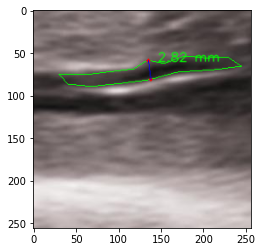

In [4]:
ms_nt('nt-45.jpg')